**Install ultralytics and roboflow libraries**

ultralytics: a library from YOLOv8 used for object detection, segmentation, image classification, training, and validation of yolo models

roboflow: a library from roboflow for managing datasets, downloading datasets to various formats, and integrating datasets into models

In [ ]:
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127

**Accessing dataset**

Initialize connection to roboflow account using API key, by accessing project from workspaces. Then download and extract dataset in YOLOv8 format to local folder

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="9QOw0aHUxw8jqKxkKL6T")
project = rf.workspace("olvy-olivia-cec6t").project("safety-helmet-3-qdmqn")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Safety-Helmet--3-1 in yolov8:: 100%|██████████| 736/736 [00:00<00:00, 2004.24it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


**Create configuration file**

Create data.yaml configuration file used by YOLOv8 during model training process. This file contains a list of object labels/classes detected by the model, total number of classes, path to each dataset image folder (train, val, and test). This file is used to ensure that YOLOv8 knows where the label data is located to be learned, which is used when training the model.

In [ ]:
fixed_yaml = """
names:
- Blue-Helmet
- No-Helmet
- Orange-Helmet
- White-Helmet
- Yellow-Helmet
nc: 5
roboflow:
  license: CC BY 4.0
  project: safety-helmet-3-qdmqn
  url: https://universe.roboflow.com/olvy-olivia-cec6t/safety-helmet-3-qdmqn/dataset/1
  version: 1
  workspace: olvy-olivia-cec6t
train: train/images
val: valid/images
test: test/images
"""

with open("/content/Safety-Helmet--3-1/data.yaml", "w") as f:
    f.write(fixed_yaml)

**Modelling**

The YOLOv8 model will learn to recognize and differentiate different colors of project helmets based on the available data.

In [ ]:
from ultralytics import YOLO

# Load arsitektur model dasar
model = YOLO('yolov8s.pt')

# Train model
model.train(
    data='/content/Safety-Helmet--3-1/data.yaml',
    epochs=30,
    imgsz=640,
    batch=16
)

100%|██████████| 21.5M/21.5M [00:00<00:00, 281MB/s]


Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Safety-Helmet--3-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, p

100%|██████████| 755k/755k [00:00<00:00, 105MB/s]

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

 21                  -1  1   1969152  ultralytics.nn.modules.block.C2f             [768, 512, 1]                 
 22        [15, 18, 21]  1   2117983  ultralytics.nn.modules.head.Detect           [5, [128, 256, 512]]          
Model summary: 129 layers, 11,137,535 parameters, 11,137,519 gradients, 28.7 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 297MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2080.2±1384.3 MB/s, size: 317.3 KB)


train: Scanning /content/Safety-Helmet--3-1/train/labels... 290 images, 0 backgrounds, 0 corrupt: 100%|██████████| 290/290 [00:00<00:00, 2462.39it/s]

train: New cache created: /content/Safety-Helmet--3-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1314.8±748.9 MB/s, size: 212.8 KB)


val: Scanning /content/Safety-Helmet--3-1/valid/labels... 37 images, 0 backgrounds, 0 corrupt: 100%|██████████| 37/37 [00:00<00:00, 792.82it/s]

val: New cache created: /content/Safety-Helmet--3-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30       3.7G      2.457      5.869      1.688         12        640: 100%|██████████| 19/19 [00:08<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all         37         96       0.14       0.28      0.237      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30       4.3G      1.795      2.065      1.321          3        640: 100%|██████████| 19/19 [00:05<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         37         96       0.43      0.607      0.511      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.35G      1.782      1.565      1.328         10        640: 100%|██████████| 19/19 [00:06<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]

                   all         37         96      0.512      0.591      0.586      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.37G      1.706      1.361      1.327          7        640: 100%|██████████| 19/19 [00:05<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]

                   all         37         96      0.472      0.695      0.607      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.42G      1.741      1.333      1.315          9        640: 100%|██████████| 19/19 [00:06<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]

                   all         37         96      0.641       0.66      0.712       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.46G      1.678      1.166      1.268          5        640: 100%|██████████| 19/19 [00:05<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         37         96      0.608       0.78      0.717      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.48G      1.677      1.114      1.266          9        640: 100%|██████████| 19/19 [00:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]

                   all         37         96        0.6      0.618      0.686       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.53G      1.614      1.048      1.264          3        640: 100%|██████████| 19/19 [00:06<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         37         96      0.718      0.753      0.792      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.57G      1.572      1.029      1.243          5        640: 100%|██████████| 19/19 [00:05<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]

                   all         37         96      0.845      0.637      0.744      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30       4.6G      1.557      1.026      1.242          4        640: 100%|██████████| 19/19 [00:06<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all         37         96      0.821      0.684      0.829      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.62G      1.553     0.9613      1.225          7        640: 100%|██████████| 19/19 [00:05<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         37         96      0.911      0.669      0.787      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.68G      1.543     0.9257      1.198          8        640: 100%|██████████| 19/19 [00:06<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]

                   all         37         96      0.812      0.644      0.768      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.71G      1.553     0.8856      1.265          6        640: 100%|██████████| 19/19 [00:05<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         37         96      0.749      0.742      0.758      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      4.75G      1.513     0.8717      1.199          8        640: 100%|██████████| 19/19 [00:05<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         37         96      0.831      0.657      0.798      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      4.77G      1.448     0.8786      1.176          4        640: 100%|██████████| 19/19 [00:06<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         37         96       0.77      0.646      0.712      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      4.82G      1.489     0.8837      1.189          8        640: 100%|██████████| 19/19 [00:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all         37         96      0.861      0.761      0.798      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      4.86G      1.484     0.8279      1.176          5        640: 100%|██████████| 19/19 [00:06<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         37         96       0.84      0.824      0.865       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.89G      1.429     0.7804      1.199          6        640: 100%|██████████| 19/19 [00:05<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         37         96      0.824      0.766      0.818      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      4.92G      1.407     0.7449      1.152         11        640: 100%|██████████| 19/19 [00:06<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all         37         96      0.773      0.794      0.798      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      4.96G      1.374     0.7547      1.146          3        640: 100%|██████████| 19/19 [00:06<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         37         96       0.83      0.726      0.811      0.375


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         5G      1.399     0.7167       1.21          3        640: 100%|██████████| 19/19 [00:07<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]

                   all         37         96       0.84      0.754      0.853       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      5.04G      1.356     0.7179      1.182          5        640: 100%|██████████| 19/19 [00:06<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.09it/s]

                   all         37         96      0.839      0.731      0.798      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      5.06G      1.319     0.6742      1.173          6        640: 100%|██████████| 19/19 [00:05<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         37         96      0.797      0.824       0.87       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      5.11G      1.293     0.6685      1.132          7        640: 100%|██████████| 19/19 [00:05<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]

                   all         37         96       0.84      0.843      0.829      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      5.15G      1.238     0.6396      1.136          3        640: 100%|██████████| 19/19 [00:06<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         37         96      0.841      0.821      0.818      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      5.18G      1.191     0.6105      1.107          3        640: 100%|██████████| 19/19 [00:05<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]

                   all         37         96      0.857      0.808      0.833      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      5.45G       1.22     0.5979      1.131          4        640: 100%|██████████| 19/19 [00:06<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]

                   all         37         96      0.903      0.807      0.847      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30       5.5G      1.183      0.596      1.074          5        640: 100%|██████████| 19/19 [00:05<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]

                   all         37         96      0.914      0.811      0.855      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      5.54G      1.119     0.5874      1.094          4        640: 100%|██████████| 19/19 [00:06<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]

                   all         37         96      0.913      0.806      0.859      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      5.58G      1.119     0.6013      1.072          2        640: 100%|██████████| 19/19 [00:05<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         37         96      0.913      0.799      0.871       0.42



30 epochs completed in 0.063 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]


                   all         37         96      0.914       0.81      0.855      0.447
           Blue-Helmet          4          5      0.952        0.6      0.669      0.268
             No-Helmet         21         28      0.862      0.672      0.752      0.369
         Orange-Helmet          6          7      0.873      0.982      0.943      0.521
          White-Helmet          4          5          1      0.992      0.995       0.61
         Yellow-Helmet         22         51      0.882      0.804      0.914      0.466
Speed: 0.2ms preprocess, 5.5ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e3474d603d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [ ]:
import yaml

# Baca file data.yaml
with open(f"{dataset.location}/data.yaml", 'r') as f:
    data_yaml = yaml.safe_load(f)

print("Jumlah kelas:", data_yaml['nc'])
print("Label yang tersedia:")
for i, name in enumerate(data_yaml['names']):
    print(f"{i}: {name}")

Jumlah kelas: 5
Label yang tersedia:
0: Blue-Helmet
1: No-Helmet
2: Orange-Helmet
3: White-Helmet
4: Yellow-Helmet


Showing the YOLOv8 model training results graph for 25 epochs, consisting of evaluation metrics and training/validation loss.

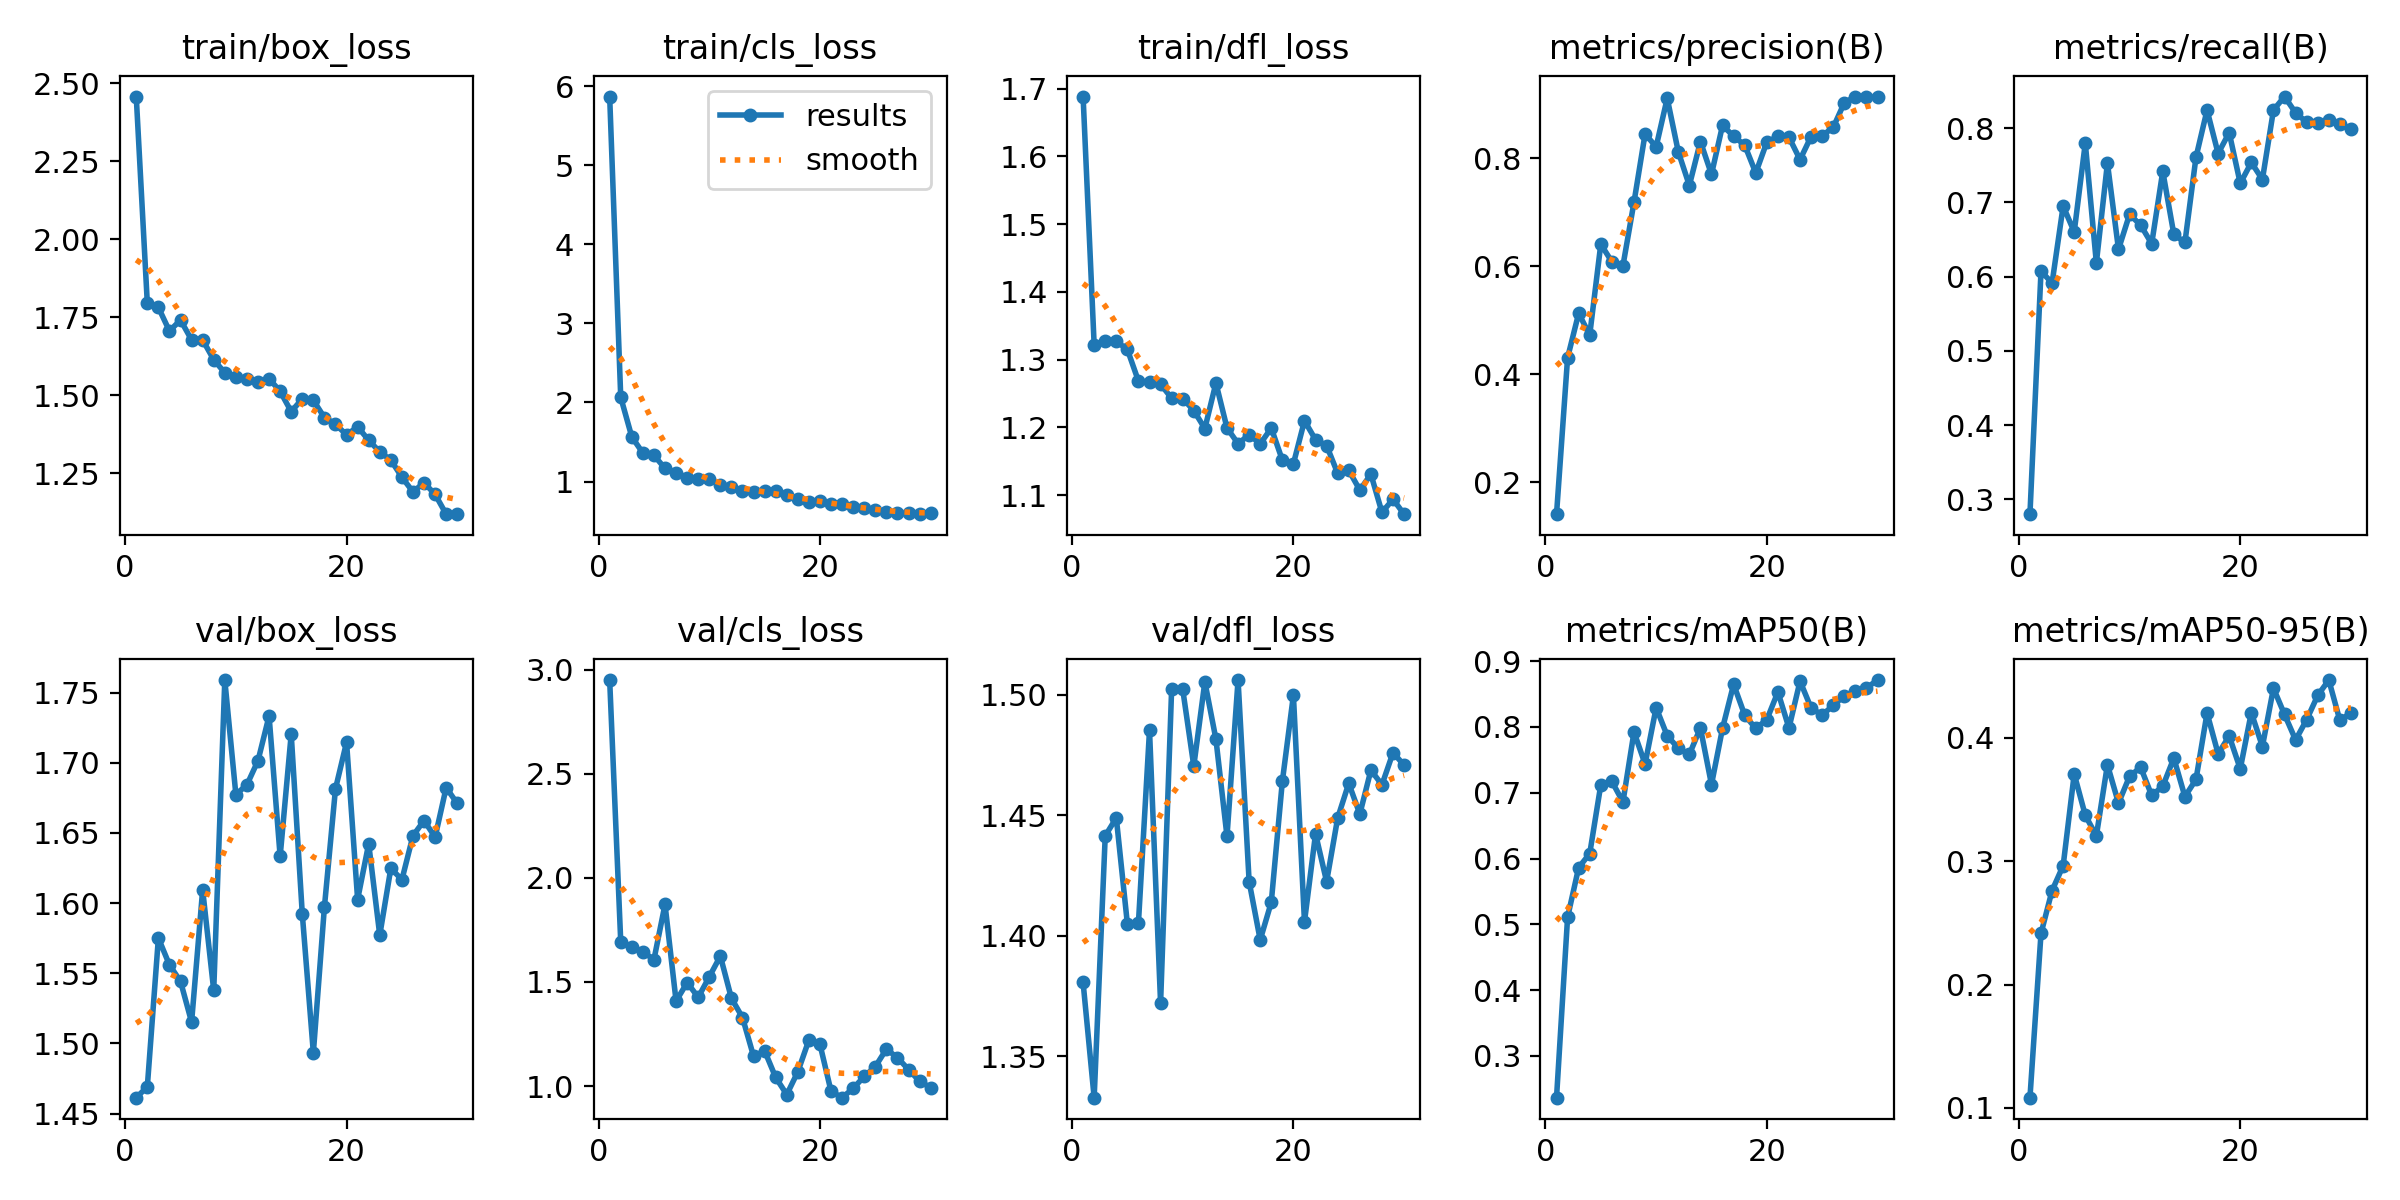

In [ ]:
from IPython.display import Image
Image(filename='/content/runs/detect/train/results.png', width=800)

**Analysis:**

The top row shows the training loss: box_loss, cls_loss, and dfl_loss all decrease consistently, indicating that the model is learning well. The precision, recall, and mAP graphs also increase, indicating an improvement in the model's performance in detecting objects. In the bottom row, the val_loss (validation) graph looks a bit more volatile, but also shows a general downward trend. Metrics such as mAP50 and mAP50-95 in validation also show good improvements, indicating that the model not only fits the training data but is also able to generalize to the test data. Overall, these graphs show that the training process is running quite well and is stable.

In [ ]:
# Uji coba
from google.colab import files
uploaded = files.upload()

Saving helm-proyek.jpg to helm-proyek.jpg



image 1/1 /content/helm-proyek.jpg: 640x640 2 Yellow-Helmets, 15.9ms
Speed: 1.8ms preprocess, 15.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


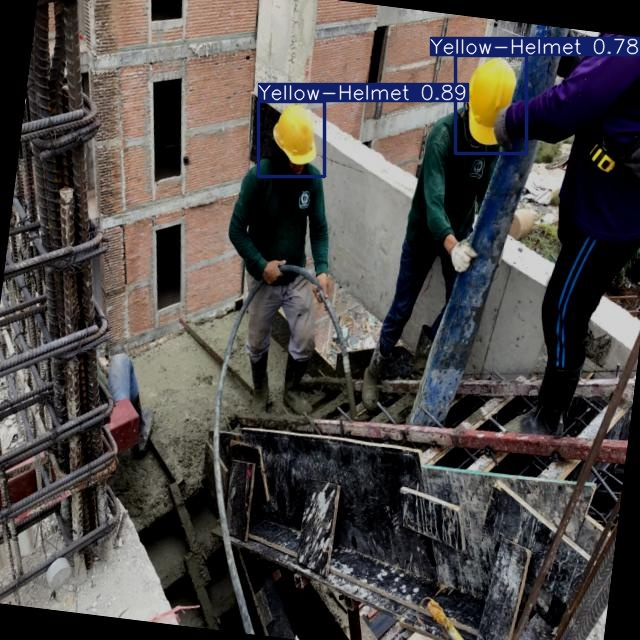

In [ ]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# 1. Load model hasil training
model = YOLO('/content/runs/detect/train/weights/best.pt')

# 2. Lakukan prediksi pada gambar
results = model('/content/helm-proyek.jpg', save=True)

# 3. Ambil path hasil deteksi
save_dir = results[0].save_dir  # direktori output
predicted_image_path = os.path.join(save_dir, 'helm-proyek.jpg')

# 4. Tampilkan hasil deteksi
display(Image(filename=predicted_image_path))

In [ ]:
from google.colab import files
files.download('/content/runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>